In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Iris\Iris_NW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,NaN,0.2
2,NaN,3.2,NaN,0.2
3,4.6,3.1,NaN,0.2
4,5.0,3.6,NaN,0.2
...,...,...,...,...
145,6.7,3.0,NaN,2.3
146,NaN,2.5,5.0,1.9
147,NaN,3.0,NaN,2.0
148,6.2,3.4,5.4,2.3


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	43
float64		column 2	14
float64		column 3	57
float64		column 4	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4
count,107.000000,136.000000,93.000000,150.000000
mean,5.884112,3.054412,4.012903,1.198667
std,0.757123,0.417198,1.485526,0.763161
min,4.400000,2.000000,1.200000,0.100000
25%,5.400000,2.800000,3.500000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.300000,3.300000,5.000000,1.800000
max,7.900000,4.400000,6.700000,2.500000


<AxesSubplot:>

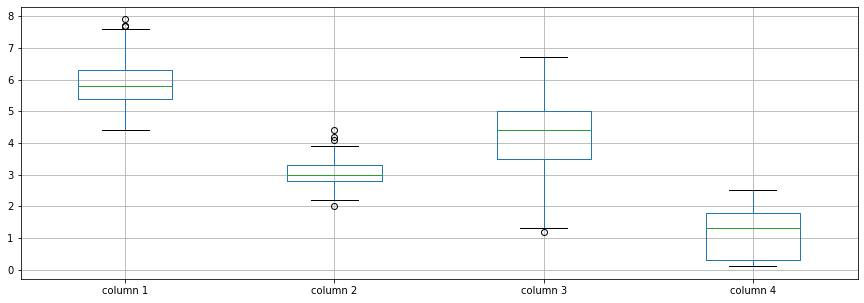

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    5.884112
column 2    3.054412
column 3    4.012903
column 4    1.198667
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4
column 1,1.000000,0.014570,0.763083,0.772221
column 2,0.014570,1.000000,-0.294570,-0.311326
column 3,0.763083,-0.294570,1.000000,0.955748
column 4,0.772221,-0.311326,0.955748,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [4,4+71,4+71+71,4+71+71+71,4+71+71+71+71,4+71+71+71+71+71,4+71+71+71+71,4+71+71+71,4+71+71,4+71,4], vae_layer = False, seed = 4)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [4]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 11.00198131137424
Epoch: 1 , loss: 10.962008264329699
Epoch: 2 , loss: 11.004370477464464
Epoch: 3 , loss: 11.034935421413845
Epoch: 4 , loss: 11.021627850002712
Epoch: 5 , loss: 10.931796391805014
Epoch: 6 , loss: 10.940311855740017
Epoch: 7 , loss: 11.116593466864693
Epoch: 8 , loss: 11.08911164601644
Epoch: 9 , loss: 10.903267860412598
Epoch: 10 , loss: 11.078690846761068
Epoch: 11 , loss: 10.929124514261881
Epoch: 12 , loss: 10.715330335828993
Epoch: 13 , loss: 10.637932883368599
Epoch: 14 , loss: 10.489308675130209
Epoch: 15 , loss: 10.148534350925022
Epoch: 16 , loss: 10.163243293762207
Epoch: 17 , loss: 10.17434353298611
Epoch: 18 , loss: 10.085786925421822
Epoch: 19 , loss: 10.114829063415527
Epoch: 20 , loss: 9.839697413974339
Epoch: 21 , loss: 9.921240276760525
Epoch: 22 , loss: 9.633387512630886
Epoch: 23 , loss: 9.787597444322374
Epoch: 24 , loss: 9.889997270372179
Epoch: 25 , loss: 9.788749

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(150, 4)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    1.325963
column 2    3.700000
column 3    0.328325
column 4    0.400000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Iris.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4
0,0.000000,0.0,0.000000,0.0
1,0.000000,0.0,-1.340757,0.0
2,-4.579836,0.0,-1.215669,0.0
3,0.000000,0.0,-1.440725,0.0
4,0.000000,0.0,-0.681762,0.0
...,...,...,...,...
145,0.000000,0.0,0.105735,0.0
146,-5.006384,0.0,0.000000,0.0
147,-3.557008,0.0,-2.680040,0.0
148,0.000000,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(36.942696023082526, 97.653468960401)

In [17]:
NRMS=numerator/denominator
NRMS


0.3783039805586731

In [18]:
new_df.iloc[66,:]

column 1    5.6
column 2    3.0
column 3    4.5
column 4    1.5
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4
0,5.100000,3.5,1.400000,0.2
1,4.900000,3.0,0.059243,0.2
2,0.120164,3.2,0.084331,0.2
3,4.600000,3.1,0.059275,0.2
4,5.000000,3.6,0.718238,0.2
...,...,...,...,...
145,6.700000,3.0,5.305735,2.3
146,1.293616,2.5,5.000000,1.9
147,2.942992,3.0,2.519960,2.0
148,6.200000,3.4,5.400000,2.3


In [20]:
imputations[-1].to_excel("Iris_NW_20(imp).xlsx", index=False, header=False)